In [1]:
import torch

import torch.nn as nn

from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim

from train_functions import get_data, train_model, check
from custom_loss import CustomLoss

from ResNetE_Decoder import ResNetE_Decoder

In [2]:
H, W = 128, 128
BATCH_SIZE = 64
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


train_transf = transforms.Compose([transforms.RandomRotation(degrees=5),
    transforms.RandomCrop(480), 
    transforms.ColorJitter(brightness = [0.8,1.2]),
    transforms.Resize((H, W)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

test_transf = transforms.Compose([transforms.Resize((H, W)),
                             transforms.ToTensor()])

train_dataset, test_dataset = get_data(reduced=True, train_transformation=train_transf, test_transformation=test_transf)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


print("The device is: ", DEVICE)
print("Number of train images: ", len(train_dataset))
print("Number of test images: ", len(test_dataset))
print("Image shape:", train_dataset[0][0].shape)
print("Mask shape:", train_dataset[0][1].shape)

The device is:  cuda
Number of train images:  1111
Number of test images:  338
Image shape: torch.Size([3, 128, 128])
Mask shape: torch.Size([1, 128, 128])


In [4]:
model = ResNetE_Decoder()

criterion = nn.L1Loss()
scores = [criterion, nn.MSELoss()]
optimizer = optim.Adam(model.parameters(), weight_decay=0.01)

num_epochs = 50

In [5]:
trained_model, predictions, train_loss, test_loss = train_model(model, train_loader, test_loader, 
                                                                num_epochs, DEVICE, criterion, scores, optimizer)

Batch [1/18], Loss: 0.7982
Batch [2/18], Loss: 0.7593
Batch [3/18], Loss: 0.6601
Batch [4/18], Loss: 0.6175
Batch [5/18], Loss: 0.5998
Batch [6/18], Loss: 0.4868
Batch [7/18], Loss: 0.4848
Batch [8/18], Loss: 0.4346
Batch [9/18], Loss: 0.4179
Batch [10/18], Loss: 0.4034
Batch [11/18], Loss: 0.3779
Batch [12/18], Loss: 0.3498
Batch [13/18], Loss: 0.3168
Batch [14/18], Loss: 0.2792
Batch [15/18], Loss: 0.2497
Batch [16/18], Loss: 0.2366
Batch [17/18], Loss: 0.2094
Batch [18/18], Loss: 0.2086
Epoch [1/50], Train Loss: 0.4384
Test Loss: L1Loss(): 0.3956; MSELoss(): 0.1882
Batch [1/18], Loss: 0.1867
Batch [2/18], Loss: 0.1819
Batch [3/18], Loss: 0.1574
Batch [4/18], Loss: 0.1633
Batch [5/18], Loss: 0.1767
Batch [6/18], Loss: 0.1505
Batch [7/18], Loss: 0.1664
Batch [8/18], Loss: 0.1740
Batch [9/18], Loss: 0.1651
Batch [10/18], Loss: 0.1568
Batch [11/18], Loss: 0.1583
Batch [12/18], Loss: 0.1366


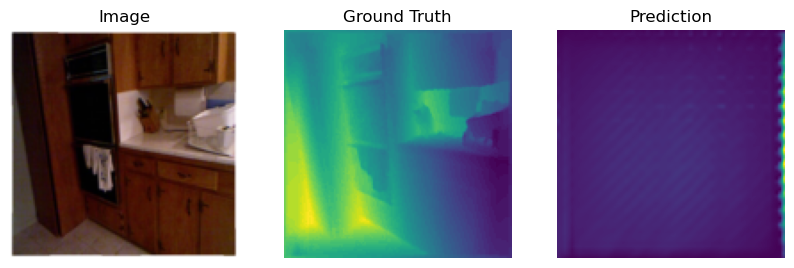

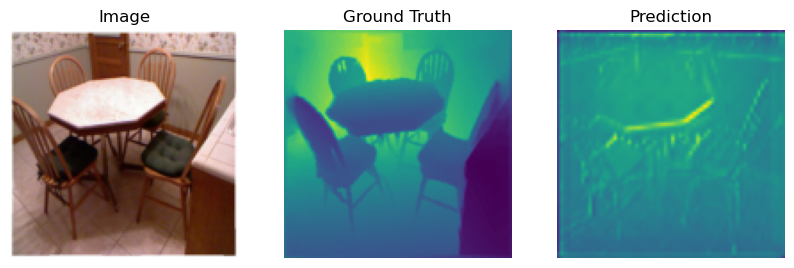

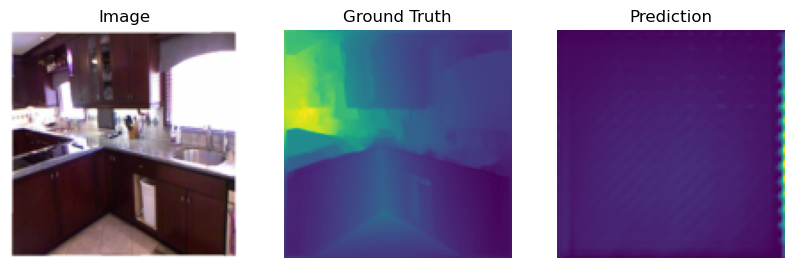

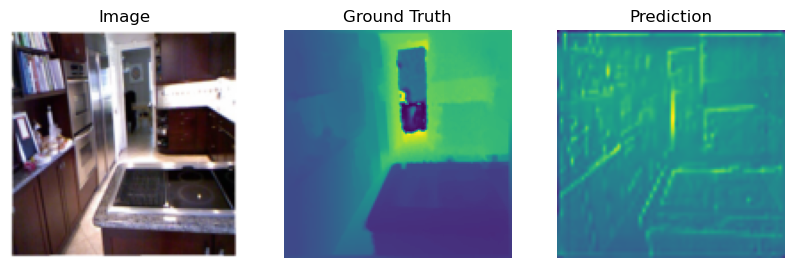

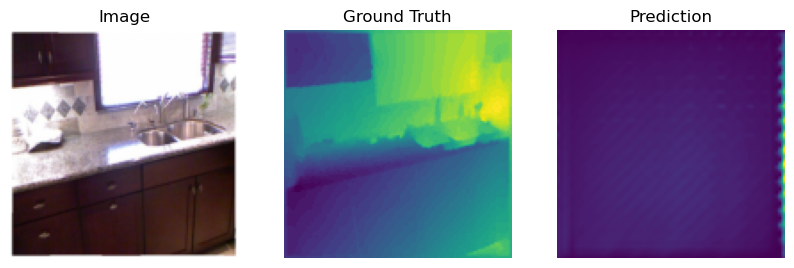

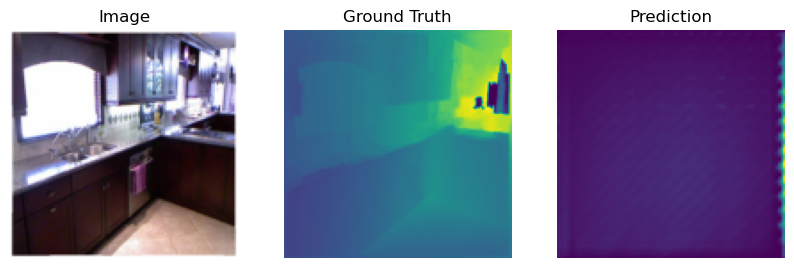

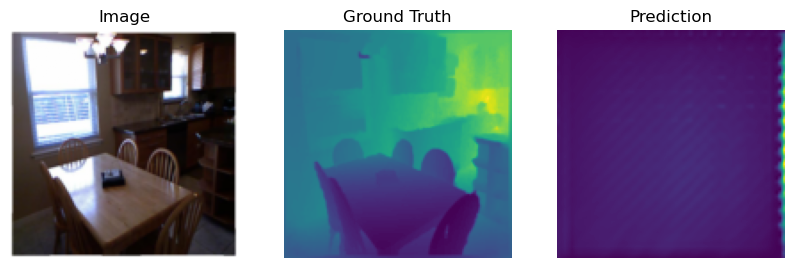

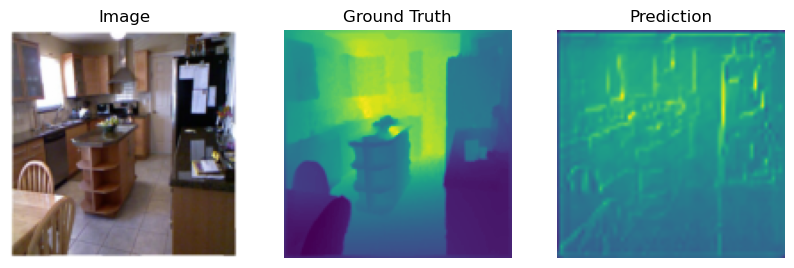

In [5]:
for i in range(10):
    image, mask = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)